In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

###  Import the dataset and explore basic info (nu ls, data types)

In [221]:
df = pd.read_csv(r"D:\Intership\dataset\Titanic-Dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
df.shape

(891, 12)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [227]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [229]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
df.isnull().sum().sum()

866

In [233]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
# df = df.drop('Cabin', axis=1)
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [237]:
df.isnull().sum().sum()

179

### Handle missing values using mean/median/imputation.

In [240]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [242]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [244]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

### Convert categorical features into numerical using encoding.

In [247]:
# le = LabelEncoder()
# df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encode a column (e.g., 'Embarked')
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

### Normalize/standardize the numerical features.

In [250]:
# Create a scaler
scaler = StandardScaler()

# List of numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])


In [252]:
df[num_cols].head(5)

,Age,Fare,SibSp,Parch
0,-0.565736,-0.502445,0.432793,-0.473674
1,0.663861,0.786845,0.432793,-0.473674
2,-0.258337,-0.488854,-0.474545,-0.473674
3,0.433312,0.420730,0.432793,-0.473674
4,0.433312,-0.486337,-0.474545,-0.473674


###  Visualize outliers using boxplots and remove them.

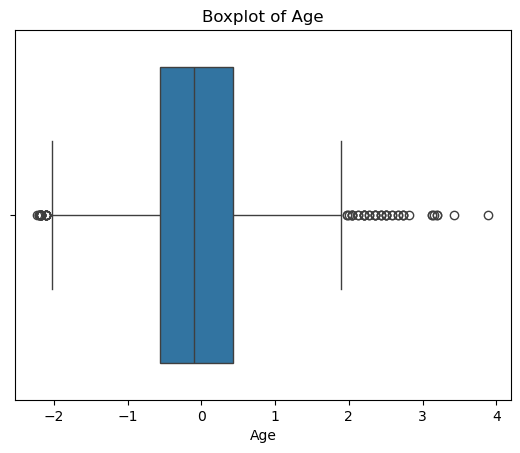

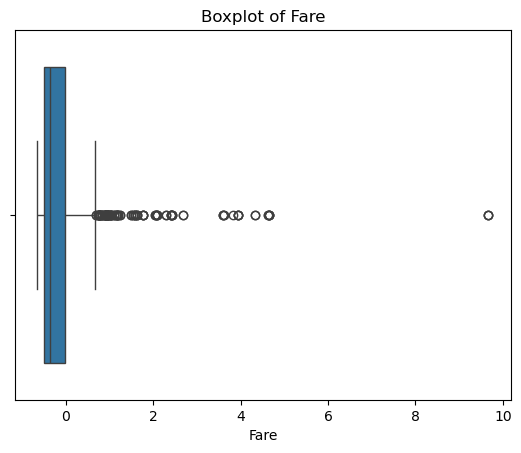

In [255]:
# Boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


In [256]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [257]:
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

In [261]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,Unknown,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,Unknown,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,0.432793,-0.473674,113803,0.420730,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,-0.474545,-0.473674,373450,-0.486337,Unknown,False,True
5,6,0,3,"Moran, Mr. James",male,-0.104637,-0.474545,-0.473674,330877,-0.478116,Unknown,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.181487,-0.474545,-0.473674,211536,-0.386671,Unknown,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.796286,-0.474545,-0.473674,112053,-0.044381,B42,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.104637,0.432793,2.008933,W./C. 6607,-0.176263,Unknown,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.258337,-0.474545,-0.473674,111369,-0.044381,C148,False,False


### After Outlier Removal

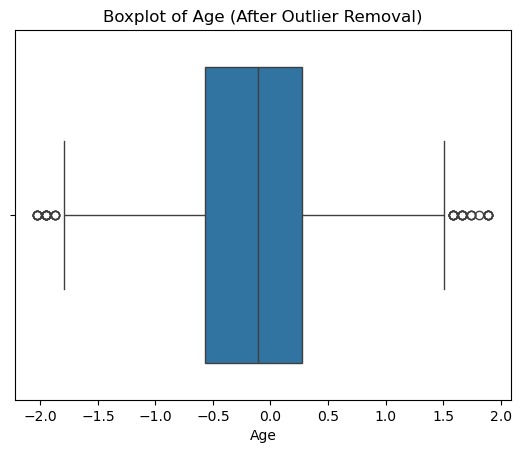

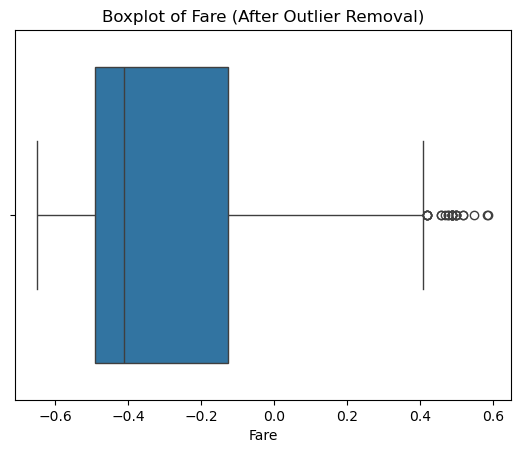

In [263]:
# Boxplot for Age after outlier removal
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age (After Outlier Removal)')
plt.show()

# Boxplot for Fare after outlier removal
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare (After Outlier Removal)')
plt.show()